In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

In [2]:
# Use the dataset from ther sklearn library
from sklearn.datasets import load_breast_cancer

In [3]:
# Loading the breast cancer dataset
data = load_breast_cancer()

X = data.data
y = data.target

feature_names = data.feature_names
target_names = data.target_names

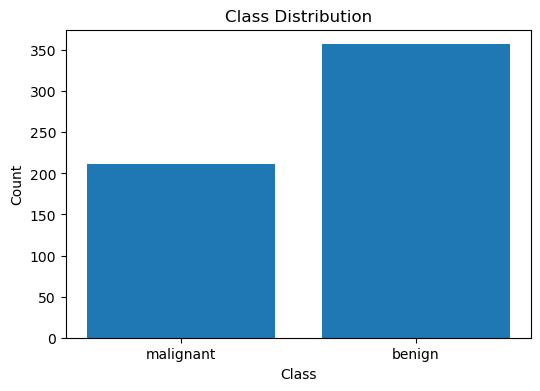

In [4]:
# Visualizing the classes distribution
plt.figure(figsize=(6, 4))
plt.bar(target_names, np.bincount(y))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [7]:
# Feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-1.811494e-15,-3.373126e-15,-3.634699e-15,-2.537653e-16,-4.232024e-15,1.011157e-15,9.857804e-16,5.817081e-16,-5.910779e-15,-3.367270e-15,...,1.397661e-15,-8.198570e-17,-8.549937e-16,-2.004746e-15,1.198553e-15,-5.875642e-16,-5.992764e-16,1.093143e-16,5.075305e-16,-2.320000e-15
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-1.572438e+00,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-6.616975e-01,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-2.632354e-01,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,4.525400e-01,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,4.120889e+00,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00


In [9]:
# Fitting logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [11]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]


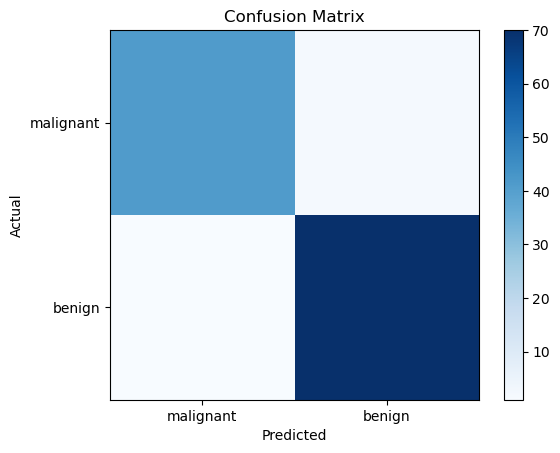

In [12]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(2)

plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

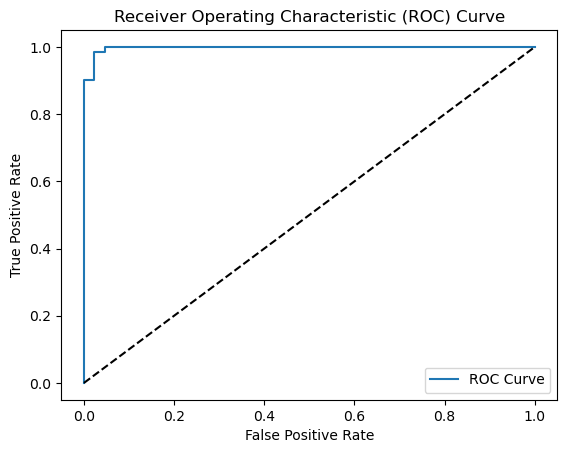

In [13]:
# Plotting the ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

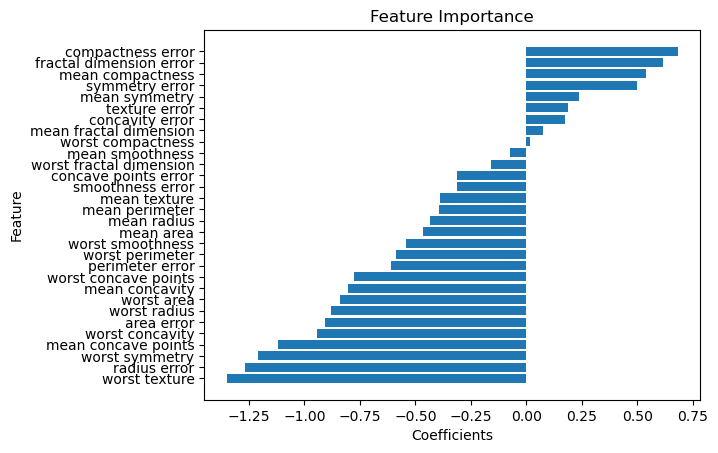

In [14]:
# Plotting feature importance
coefficients = classifier.coef_[0]
sorted_indices = np.argsort(coefficients)

plt.barh(
    range(len(coefficients)),
    coefficients[sorted_indices],
    tick_label=feature_names[sorted_indices],
)

plt.title("Feature Importance")
plt.xlabel("Coefficients")
plt.ylabel("Feature")
plt.show()